# 이미지 인식 - CNN 
## MNIST 사례 

In [6]:
from keras.datasets import mnist
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np
import os 
import tensorflow as tf

In [3]:
#seed 값 설정 
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

In [9]:
#MNIST 데이터 불러오기 
(X_train , Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [11]:
# 컨볼루션 신경망 설정 
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

W0819 11:25:01.998594  5796 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0819 11:25:02.001594  5796 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0819 11:25:02.007595  5796 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])



W0819 11:25:38.414710  5796 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 11:25:38.468313  5796 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
#모델 최적화 설정 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [14]:
#모델의 실행 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size = 200, verbose =0,
                   callbacks = [early_stopping_callback, checkpointer])

W0819 11:26:39.957971  5796 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_loss improved from inf to 0.05376, saving model to ./model/01-0.0538.hdf5

Epoch 00002: val_loss improved from 0.05376 to 0.04183, saving model to ./model/02-0.0418.hdf5

Epoch 00003: val_loss improved from 0.04183 to 0.03417, saving model to ./model/03-0.0342.hdf5

Epoch 00004: val_loss did not improve from 0.03417

Epoch 00005: val_loss did not improve from 0.03417

Epoch 00006: val_loss improved from 0.03417 to 0.03109, saving model to ./model/06-0.0311.hdf5

Epoch 00007: val_loss did not improve from 0.03109

Epoch 00008: val_loss did not improve from 0.03109

Epoch 00009: val_loss improved from 0.03109 to 0.03007, saving model to ./model/09-0.0301.hdf5

Epoch 00010: val_loss improved from 0.03007 to 0.02861, saving model to ./model/10-0.0286.hdf5

Epoch 00011: val_loss did not improve from 0.02861

Epoch 00012: val_loss did not improve from 0.02861

Epoch 00013: val_loss did not improve from 0.02861

Epoch 00014: val_loss did not improve from 0.02861

Epoch 00015

In [15]:
#테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 197us/step

 Test Accuracy: 0.9927


In [16]:
#테스트셋의 오차 
y_vloss = history.history['val_loss']

In [17]:
#학습셋의 오차 
y_loss = history.history['loss']

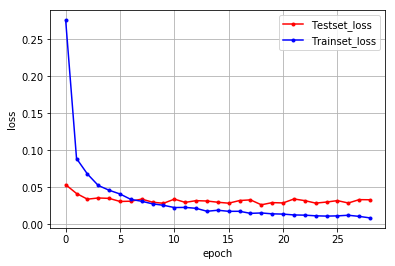

In [18]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= 'blue', label = 'Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')

#plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')    
plt.show()

### 결론: Best Model은 Epoch 13, 정확도는 99.27%